# Exploring the gliders ERDDAP server

In [1]:
from erddapy import ERDDAP


e = ERDDAP(
    server='https://data.ioos.us/gliders/erddap',
    protocol='tabledap',
)

### Define filter criteria:

Using the erddapy library to query the IOOS Glider DAC ERDDAP server, we'll look for CF standard name 'sea_water_temperature' with a bounding box covering roughly the Gulf of Mexico year 2018.  Also, filter by CDM data type of 'trajectoryprofile'.


In [2]:
min_lat, max_lat = 20, 30
min_lon, max_lon = -82, -97
        
kw = {
    'standard_name': 'sea_water_temperature',
    'min_lon': min_lon,
    'max_lon': max_lon,
    'min_lat': min_lat,
    'max_lat': max_lat,
    'min_time': '2018-01-10T00:00:00Z',
    'max_time': '2018-09-01T00:00:00Z',
    'cdm_data_type': 'trajectoryprofile'
}

erddapy generates an ERDDAP 'advanced' search-compliant search url for us automatically (preview results using the link below):

In [3]:
search_url = e.get_search_url(response='csv', **kw)

print('search_url: ' + search_url)

search_url: https://data.ioos.us/gliders/erddap/search/advanced.csv?page=1&itemsPerPage=1000&protocol=(ANY)&cdm_data_type=trajectoryprofile&institution=(ANY)&ioos_category=(ANY)&keywords=(ANY)&long_name=(ANY)&standard_name=sea_water_temperature&variableName=(ANY)&minLon=-82&maxLon=-97&minLat=20&maxLat=30&minTime=1515542400.0&maxTime=1535760000.0


## Pandas integration:

Interrogate the search results using a Pandas DataFrame created from ERDDAP's csv output format:

In [4]:
import pandas as pd

search = pd.read_csv(search_url)
gliders = search['Dataset ID'].values

print('Found {} Glider Datasets:\n{}'.format(len(gliders), '\n'.join(gliders)))

Found 18 Glider Datasets:
allgcoos_dmacGliders
allrutgersGliders
allsecooraGliders
ng290-20180701T0000
ng295-20180701T0000
ng309-20180701T0000
ng342-20180701T0000
ng429-20180701T0000
ng448-20180701T0000
ng450-20180701T0000
ng464-20180701T0000
ng466-20180701T0000
ng489-20180701T0000
ng512-20180701T0000
ng596-20180701T0000
Reveille-20180627T1500
sam-20180824T0000
Sverdrup-20180509T1742


__Find out more about a particular dataset of interest using the `info` URL:__

Here, we just display the top 50 results returned, which mostly consists of dataset `NC_GLOBAL` variables.

In [5]:
dataset_id = 'sam-20180824T0000'

info_url = e.get_info_url(dataset_id=dataset_id, response='csv')
info = pd.read_csv(info_url)

info.head(50)


,Row Type,Variable Name,Attribute Name,Data Type,Value
0,attribute,NC_GLOBAL,acknowledgement,String,This work was supported by funding from The St...
1,attribute,NC_GLOBAL,cdm_data_type,String,TrajectoryProfile
2,attribute,NC_GLOBAL,cdm_profile_variables,String,"profile_id, time, latitude, longitude, time_uv..."
3,attribute,NC_GLOBAL,cdm_trajectory_variables,String,"trajectory, wmo_id"
4,attribute,NC_GLOBAL,contributor_name,String,"Chad Lembke, Robert Weisberg"
5,attribute,NC_GLOBAL,contributor_role,String,"Principal Investigator, Principal Investigator"
6,attribute,NC_GLOBAL,contributor_url,String,"https://www.marine.usf.edu, https://www.marine..."
7,attribute,NC_GLOBAL,Conventions,String,"Unidata Dataset Discovery v1.0, COARDS, CF-1.6"
8,attribute,NC_GLOBAL,creator_email,String,dmac@secoora.org
9,attribute,NC_GLOBAL,creator_name,String,SECOORA Glider Observatory


__Variables in an ERDDAP dataset__

Let's do a quick query using ERDDAP's info results for the dataset to show what variables it contains:

(Exclude `NC_GLOBAL` since those repesent the dataset global variables)



In [6]:
variables = info.loc[info['Variable Name'] != 'NC_GLOBAL', 'Variable Name'].unique()

print("Dataset {} has the following variables:\n{}".format(dataset_id, '\n'.join(variables)))


Dataset sam-20180824T0000 has the following variables:
trajectory
wmo_id
time
latitude
latitude_qc
longitude
longitude_qc
time_qc
depth
depth_qc
pressure
pressure_qc
conductivity
conductivity_qc
density
density_qc
precise_lat
precise_lon
precise_time
profile_id
precise_lat_qc
precise_lon_qc
precise_time_qc
salinity
salinity_qc
temperature
temperature_qc
time_uv
time_uv_qc
lat_uv
lat_uv_qc
lon_uv
lon_uv_qc
u
u_qc
v
v_qc
platform_meta
instrument_ctd


__Display attribution of a particular variable__

We can then see the attribution of a variable of interest to  by applying a filter (we'll go with 'temperature'):

Among other things, we can see the `standard_name` value is: 'sea_water_temperature'

In [7]:
info.loc[info['Variable Name'] == 'temperature']


,Row Type,Variable Name,Attribute Name,Data Type,Value
353,variable,temperature,NaN,float,NaN
354,attribute,temperature,_FillValue,float,-9999.9
355,attribute,temperature,actual_range,float,"20.8043, 30.5276"
356,attribute,temperature,colorBarMaximum,double,32.0
357,attribute,temperature,colorBarMinimum,double,0.0
358,attribute,temperature,coordinates,String,time latitude longitude depth
359,attribute,temperature,instrument,String,instrument_ctd
360,attribute,temperature,ioos_category,String,Temperature
361,attribute,temperature,long_name,String,Sea Water Temperature
362,attribute,temperature,observation_type,String,measured


__Identifying CF Standard Names__

But, if we want to see all of the CF standard names associated with _each_ variable in the dataset, we can do that as well:

You can see some repeats exist where variables represent similar information (eg. time, latitude, longitude).

In [8]:
info.loc[info['Attribute Name'] == 'standard_name', 'Value']

77                                  time
92                              latitude
117                            longitude
156                                depth
182                   sea_water_pressure
206    sea_water_electrical_conductivity
230                    sea_water_density
258                             latitude
277                            longitude
290                                 time
340         sea_water_practical_salinity
364                sea_water_temperature
384                                 time
406                             latitude
429                            longitude
453          eastward_sea_water_velocity
477         northward_sea_water_velocity
Name: Value, dtype: object

## Obtaining Data from ERDDAP:

Let's use a list of CF Standard Names of interest from the list above and filter the `info` results again to see which variables correspond to our names:


In [9]:
standard_names = [
    'depth', 
    'latitude', 
    'longitude', 
    'sea_water_practical_salinity', 
    'sea_water_temperature',
    'sea_water_density',
    'time'
]

variables_df = info.loc[ (info['Attribute Name'] == 'standard_name') & (info['Value'].isin(standard_names)) ]
variables_df

,Row Type,Variable Name,Attribute Name,Data Type,Value
77,attribute,time,standard_name,String,time
92,attribute,latitude,standard_name,String,latitude
117,attribute,longitude,standard_name,String,longitude
156,attribute,depth,standard_name,String,depth
230,attribute,density,standard_name,String,sea_water_density
258,attribute,precise_lat,standard_name,String,latitude
277,attribute,precise_lon,standard_name,String,longitude
290,attribute,precise_time,standard_name,String,time
340,attribute,salinity,standard_name,String,sea_water_practical_salinity
364,attribute,temperature,standard_name,String,sea_water_temperature


Using the variable/CF Standard Name table above, we can pick some variable names of interest and grab the measurements using erddapy:

In [10]:
variables = [
 'depth',
 'latitude',
 'longitude',
 'salinity',
 'temperature',
 'time',
]

e.dataset_id = dataset_id
e.variables = variables

print(
    e.get_download_url(
        response='mat',  # like matlab? ERDDAP has your back!
    )
)

https://data.ioos.us/gliders/erddap/tabledap/sam-20180824T0000.mat?depth,latitude,longitude,salinity,temperature,time


Clicking in the URL above will get a `.mat` file ready for download.
However, we'll stay in the Python world and use pandas to load a `csv`.

Here we use erddapy's `to_pandas` function, passing it an index column value name of `time` to structure our DataFrame along the time dimension.

In [11]:
df = e.to_pandas(
    index_col='time',
    parse_dates=True,
    skiprows=(1,)
).dropna()

df.head()

,depth,latitude,longitude,salinity,temperature
time,,,,,
2018-08-24 22:28:56,2.771356,28.351149,-83.498135,34.554237,29.9049
2018-08-24 22:28:56,3.426940,28.351149,-83.498135,34.592440,29.8862
2018-08-24 22:28:56,4.469911,28.351149,-83.498135,34.635780,29.8539
2018-08-24 22:28:56,5.522809,28.351149,-83.498135,34.670925,29.8730
2018-08-24 22:28:56,6.357177,28.351149,-83.498135,34.725838,29.9482


### Plot a trajectoryProfile of water temperature using matplotlib



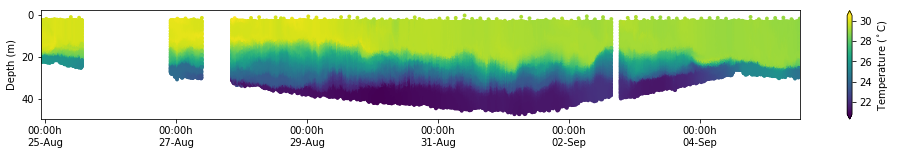

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(17, 2))
cs = ax.scatter(df.index, df['depth'], s=15, c=df['temperature'],
                marker='o', edgecolor='none')

ax.invert_yaxis()
ax.set_xlim(df.index[0], df.index[-1])
xfmt = mdates.DateFormatter('%H:%Mh\n%d-%b')
ax.xaxis.set_major_formatter(xfmt)

cbar = fig.colorbar(cs, orientation='vertical', extend='both')
cbar.ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_ylabel('Depth (m)');

### Plot the glider track using Cartopy:

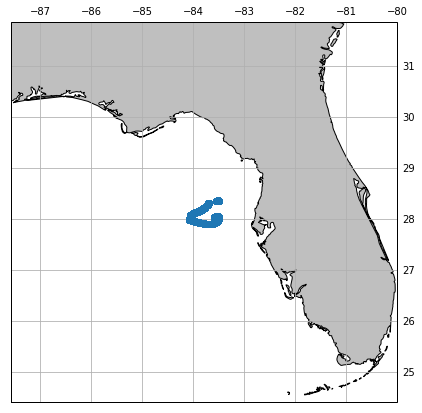

In [13]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


land_10m = cfeature.NaturalEarthFeature(
    'physical', 'land', '10m',
     edgecolor='k', facecolor='0.75',
)


fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.PlateCarree()},
    figsize=(7, 7)
)

ax.plot(df['longitude'], df['latitude'], 'o')

gl = ax.gridlines(draw_labels=True)
gl.xlabels_bottom = gl.ylabels_left = False

ax.add_feature(land_10m)

dx = dy = 3.5
ax.set_extent(
    [df['longitude'].min()-dx, df['longitude'].max()+dx,
     df['latitude'].min()-dy, df['latitude'].max()+dy]
);

### End

Just a placeholder for some mock up API interaction for a theoretical `dataset` class for erddapy

```
e.dataset_id = dataset_id


dataset = e.get_dataset()
dataset                   #show variables, global attributes/other metadata
```
```
dataset.variables = variables

data = d.get_download_url(
        response='mat',  # like matlab? ERDDAP has your back!
    )
```